## Problem set 4

### Problem 0

Run the cell below to make sure you are in the data1030 coding environment. 

We will deduct 2 points for every missing OK sign. (If you don't run the cell, that's -14 points.)


In [2]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.11.4"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.11"):
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.24.4", 'matplotlib': "3.7.2",'sklearn': "1.3.0", 
                'pandas': "2.0.3",'xgboost': "1.7.6", 'shap': "0.42.1", 'seaborn': "0.12.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.11.4

[ OK ] numpy version 1.24.4 is installed.
[ OK ] matplotlib version 3.7.2 is installed.
[ OK ] sklearn version 1.3.0 is installed.
[ OK ] pandas version 2.0.3 is installed.
[ OK ] xgboost version 1.7.6 is installed.
[ OK ] shap version 0.42.1 is installed.
[ OK ] seaborn version 0.12.2 is installed.


### Problem 1 (10 points)

We will work with the [hand postures dataset](https://archive.ics.uci.edu/ml/datasets/Motion+Capture+Hand+Postures). You saw in the previous problem set that it contains a large amount of missing values. Describe why you would or wouldn't use the below techniques to handle the missing values in this dataset. Use code to support your argument and write a paragraph or two of text answer for each method. The csv file is located in the data folder.

In [3]:
import numpy as np
import pandas as pd
posture_data = pd.read_csv("/Users/apple/Desktop/Data 1030/github-classroom-Data1030-Xiner Zhao/ps4-XXXXiner/data/Postures.csv")
df = posture_data.drop(labels=0,axis=0) # drop the first row 
df = df.replace('?',np.nan)
print(df.head())

   Class  User         X0         Y0         Z0         X1         Y1  \
1      1     0  54.263880  71.466776 -64.807709  76.895635  42.462500   
2      1     0  56.527558  72.266609 -61.935252  39.135978  82.538530   
3      1     0  55.849928  72.469064 -62.562788  37.988804  82.631347   
4      1     0  55.329647  71.707275 -63.688956  36.561863  81.868749   
5      1     0  55.142401  71.435607 -64.177303  36.175818  81.556874   

          Z1         X2         Y2  ...   Z8   X9   Y9   Z9  X10  Y10  Z10  \
1 -72.780545  36.621229  81.680557  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2 -49.596509  79.223743  43.254091  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3 -50.606259  78.451526  43.567403  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4 -52.752784  86.320630  68.214645  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5 -53.475747  76.986143  42.426849  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   X11  Y11  Z11  
1  NaN  NaN  NaN  
2  NaN  NaN  NaN  
3  NaN  NaN  NaN  
4  NaN  NaN  NaN

**1. Drop the columns with missing values:**

In [4]:
# your code here 
print(df.shape)
df_col = df.dropna(axis=1)
print(df_col.shape)

(78095, 38)
(78095, 11)


*your text response here:*

From the result above, we can know that there are 27 columns(features) containing missing value. If we drop all of them, we will lose 27 features, which may contain very important information in some of that. So we may lose that important information if we drop all the columns containg missing value. Therefore, we should not choose this method.

**2. Drop the rows with missing values:**

In [5]:
# your code here
print(df.shape)
df_row = df.dropna()
print(df_row.shape)

(78095, 38)
(31, 38)


*your text response here:*

From the result above, we can know that there are only 31 rows that are not contain missing value. If we drop the rest 78064 rows which contain misssing value, we will lose a large number of datapoints so that we may not have enough datapoints to support our machine learning model. Therefore, we should not choose this method.

**3. Mean or median imputation:**

In [6]:
# your code here
from sklearn.impute import SimpleImputer
df = df.apply(pd.to_numeric)
si = SimpleImputer(strategy='mean')
X_imputation = si.fit_transform(df)
print(X_imputation)
X_imputation = pd.DataFrame(X_imputation,columns=df.columns)
compare = pd.DataFrame([df.var(),X_imputation.var()],index=['Before imputation','After imputation'])
print(compare)

[[  1.           0.          54.26387995 ... -29.69761314  25.96333159
    1.69731244]
 [  1.           0.          56.52755845 ... -29.69761314  25.96333159
    1.69731244]
 [  1.           0.          55.84992755 ... -29.69761314  25.96333159
    1.69731244]
 ...
 [  5.          14.          54.1515399  ... -29.69761314  25.96333159
    1.69731244]
 [  5.          14.          27.91531134 ... -29.69761314  25.96333159
    1.69731244]
 [  5.          14.          27.89870542 ... -29.69761314  25.96333159
    1.69731244]]
                      Class       User           X0           Y0           Z0  \
Before imputation  2.019674  22.068894  1069.020959  1616.317201  1180.745044   
After imputation   2.019674  22.068894  1069.020959  1616.317201  1180.745044   

                            X1           Y1           Z1           X2  \
Before imputation  1054.817977  1636.388342  1208.567707  1129.306419   
After imputation   1054.817977  1636.388342  1208.567707  1129.306419   

        

*your text response here*

From the 'compare' dataset above, we can find that the variance of those features, which contain missing value, decreases a lot. So we should not choose this method.

### Problem 2a (5 points)

Load the diabetes dataset using this [URL](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt). Split and preprocess the dataset as we discussed in class. 

In [7]:
# your code here

data = np.loadtxt("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt",dtype = 'object', delimiter = '\t')
df = pd.DataFrame(data, columns = data[0])
df.drop([0], inplace=True)
df = pd.DataFrame(df,dtype=float)
df['AGE'] = df['AGE'].astype(int)
df['SEX'] = df['SEX'].astype(int)
print(df)

     AGE  SEX   BMI      BP     S1     S2    S3    S4      S5     S6      Y
1     59    2  32.1  101.00  157.0   93.2  38.0  4.00  4.8598   87.0  151.0
2     48    1  21.6   87.00  183.0  103.2  70.0  3.00  3.8918   69.0   75.0
3     72    2  30.5   93.00  156.0   93.6  41.0  4.00  4.6728   85.0  141.0
4     24    1  25.3   84.00  198.0  131.4  40.0  5.00  4.8903   89.0  206.0
5     50    1  23.0  101.00  192.0  125.4  52.0  4.00  4.2905   80.0  135.0
..   ...  ...   ...     ...    ...    ...   ...   ...     ...    ...    ...
438   60    2  28.2  112.00  185.0  113.8  42.0  4.00  4.9836   93.0  178.0
439   47    2  24.9   75.00  225.0  166.0  42.0  5.00  4.4427  102.0  104.0
440   60    2  24.9   99.67  162.0  106.6  43.0  3.77  4.1271   95.0  132.0
441   36    1  30.0   95.00  201.0  125.2  42.0  4.79  5.1299   85.0  220.0
442   36    1  19.6   71.00  250.0  133.2  97.0  3.00  4.5951   92.0   57.0

[442 rows x 11 columns]


In [8]:
from sklearn.model_selection import train_test_split

X = df.loc[:,df.columns != 'Y']
y = df['Y']

random_state = 1030
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6, random_state = random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5, random_state = random_state)
print('Training Set:')
print(X_train.head())
print(y_train.head())

Training Set:
     AGE  SEX   BMI    BP     S1     S2    S3   S4      S5     S6
420   43    1  21.3  79.0  141.0   78.8  53.0  3.0  3.8286   90.0
246   41    1  23.1  86.0  148.0   78.0  58.0  3.0  4.0943   60.0
76    46    2  23.5  87.0  181.0  114.8  44.0  4.0  4.7095   98.0
382   29    2  18.1  73.0  158.0   99.0  41.0  4.0  4.4998   78.0
240   55    1  28.2  91.0  250.0  140.2  67.0  4.0  5.3660  103.0
420     42.0
246    125.0
76      42.0
382    104.0
240    262.0
Name: Y, dtype: float64


In [9]:
# (1)Category feature preprocessing
from sklearn.preprocessing import OneHotEncoder
ctg_ftrs = ['SEX']
enc = OneHotEncoder(sparse=False,handle_unknown='ignore') # by default, OneHotEncoder returns a sparse matrix. sparse=False returns a 2D array

X_train_ctg = enc.fit_transform(X_train[ctg_ftrs])
X_train_ctg = pd.DataFrame(X_train_ctg,columns=['SEX=1','SEX=2'])
print(X_train_ctg.head())

X_val_ctg = enc.transform(X_val[ctg_ftrs])
X_val_ctg = pd.DataFrame(X_val_ctg,columns=['SEX=1','SEX=2'])
print(X_val_ctg.head())

X_test_ctg = enc.transform(X_test[ctg_ftrs])
X_test_ctg = pd.DataFrame(X_test_ctg,columns=['SEX=1','SEX=2'])
print(X_test_ctg.head())

# (2)Continuous feature preprocessing
from sklearn.preprocessing import StandardScaler
std_ftrs = ['AGE','BMI','BP','S1','S2','S3','S4','S5','S6',]
scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train[std_ftrs])
X_train_scal = pd.DataFrame(X_train_scal,columns=std_ftrs)
print(X_train_scal.head())

X_val_scal = scaler.transform(X_val[std_ftrs])
X_val_scal = pd.DataFrame(X_val_scal,columns=std_ftrs)
print(X_val_scal.head())

X_test_scal = scaler.transform(X_test[std_ftrs])
X_test_scal = pd.DataFrame(X_test_scal,columns=std_ftrs)
print(X_test_scal.head())

   SEX=1  SEX=2
0    1.0    0.0
1    1.0    0.0
2    0.0    1.0
3    0.0    1.0
4    1.0    0.0
   SEX=1  SEX=2
0    0.0    1.0
1    1.0    0.0
2    1.0    0.0
3    1.0    0.0
4    1.0    0.0
   SEX=1  SEX=2
0    1.0    0.0
1    0.0    1.0
2    1.0    0.0
3    0.0    1.0
4    0.0    1.0
        AGE       BMI        BP        S1        S2        S3        S4  \
0 -0.457073 -1.174831 -1.119816 -1.374107 -1.183080  0.288283 -0.883826   
1 -0.617396 -0.759170 -0.624564 -1.172783 -1.209156  0.668357 -0.883826   
2 -0.216588 -0.666801 -0.553814 -0.223682 -0.009668 -0.395851 -0.107203   
3 -1.579335 -1.913785 -1.544317 -0.885176 -0.524665 -0.623895 -0.107203   
4  0.504867  0.418537 -0.270813  1.760802  0.818240  1.352491 -0.107203   

         S5        S6  
0 -1.672267 -0.108427  
1 -1.146693 -2.704787  
2  0.070218  0.583936  
3 -0.344584 -1.146971  
4  1.368823  1.016663  
        AGE       BMI        BP        S1        S2        S3        S4  \
0  0.104059 -0.181863  0.436689  1.156829 

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [10]:
X_train_preprocess = pd.concat([X_train_ctg,X_train_scal],axis = 1)
print(X_train_preprocess.head())

X_val_preprocess = pd.concat([X_val_ctg,X_val_scal],axis = 1)
print(X_val_preprocess.head())

X_test_preprocess = pd.concat([X_test_ctg,X_test_scal],axis = 1)
print(X_test_preprocess.head())

   SEX=1  SEX=2       AGE       BMI        BP        S1        S2        S3  \
0    1.0    0.0 -0.457073 -1.174831 -1.119816 -1.374107 -1.183080  0.288283   
1    1.0    0.0 -0.617396 -0.759170 -0.624564 -1.172783 -1.209156  0.668357   
2    0.0    1.0 -0.216588 -0.666801 -0.553814 -0.223682 -0.009668 -0.395851   
3    0.0    1.0 -1.579335 -1.913785 -1.544317 -0.885176 -0.524665 -0.623895   
4    1.0    0.0  0.504867  0.418537 -0.270813  1.760802  0.818240  1.352491   

         S4        S5        S6  
0 -0.883826 -1.672267 -0.108427  
1 -0.883826 -1.146693 -2.704787  
2 -0.107203  0.070218  0.583936  
3 -0.107203 -0.344584 -1.146971  
4 -0.107203  1.368823  1.016663  
   SEX=1  SEX=2       AGE       BMI        BP        S1        S2        S3  \
0    0.0    1.0  0.104059 -0.181863  0.436689  1.156829  1.535325 -0.471866   
1    1.0    0.0 -1.258689 -0.251140 -0.695314 -0.971458 -0.980992  0.136253   
2    1.0    0.0  0.344544  0.510906 -0.483064 -0.511288 -0.531184 -0.623895   
3    

### Problem 2b (10 points)

Read the wiki pages of the [F test](https://en.wikipedia.org/wiki/F-test) and [mutual information](https://en.wikipedia.org/wiki/Mutual_information), and read the manuals of [f_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html), [f_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html), [mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html), and [mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html).

Calculate how strong the linear correlation is between each feature and the target variable (disease progression). Prepare a bar plot that shows the top 5 most important features.

Calculate the non-linear correlations with the target variable and plot the top 5 most important features.

Describe the two plots in a paragraph or two. What similarities and differences do you observe?

Prepare a plot which shows the most important feature vs. the target variable!

f score [  0.31119963   0.31119963   9.7924038  140.7515856   67.11253123
  12.40392482   9.26553913  48.09048501  60.77028344 106.56135017
  48.86877781]
p values [5.77419508e-01 5.77419508e-01 1.94970028e-03 2.73859355e-26
 1.12564835e-14 5.04929437e-04 2.57177428e-03 3.14770984e-11
 1.49973147e-13 3.39654686e-21 2.25154849e-11]
[3, 9, 4, 8, 10]
Top 5 most important features are: Index(['BMI', 'S5', 'BP', 'S4', 'S6'], dtype='object')
              0
BMI  140.751586
S5   106.561350
BP    67.112531
S4    60.770283
S6    48.868778


<Figure size 500x300 with 0 Axes>

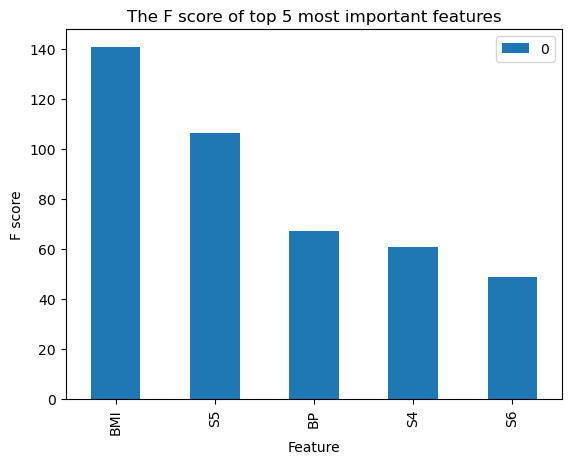

In [11]:
# your code here
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression

f_test, p_values = f_regression(X_train_preprocess, y_train)
print('f score',f_test)
print('p values',p_values)

top5_indices = sorted(range(len(f_test)), key=lambda i: f_test[i], reverse=True)[:5] # Get the indices of the top 5 F-scores
print(top5_indices)
top5_feature_names = X_train_preprocess.columns[top5_indices] # Get the corresponding feature names
print('Top 5 most important features are:',top5_feature_names)

f_test_top5 = f_test[top5_indices]
f_test_top5 = pd.DataFrame(f_test_top5,index=top5_feature_names)
print(f_test_top5)
plt.figure(figsize=(5,3))
f_test_top5.plot.bar()
plt.ylabel('F score')
plt.xlabel('Feature')
plt.title('The F score of top 5 most important features')
plt.show()

mi [0.         0.         0.00407623 0.22525381 0.05965396 0.04908315
 0.03093345 0.14820347 0.11889294 0.18664979 0.02327806]
[3, 9, 7, 8, 4]
Top 5 most important features are: Index(['BMI', 'S5', 'S3', 'S4', 'BP'], dtype='object')
            0
BMI  0.225254
S5   0.186650
S3   0.148203
S4   0.118893
BP   0.059654


<Figure size 500x300 with 0 Axes>

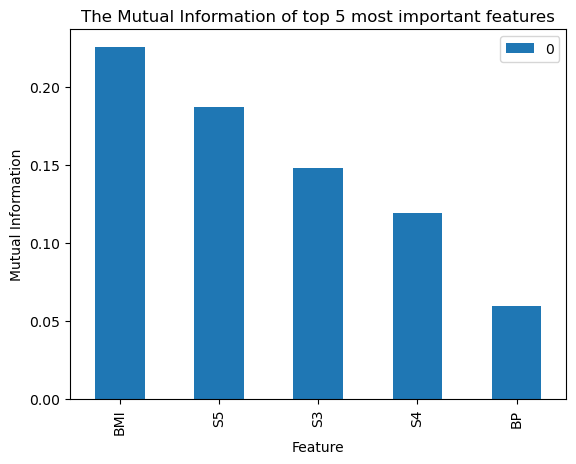

In [16]:
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(X_train_preprocess, y_train)
print('mi',mi)

top5_indices = sorted(range(len(mi)), key=lambda i: mi[i], reverse=True)[:5] # Get the indices of the top 5 F-scores
print(top5_indices)
top5_feature_names = X_train_preprocess.columns[top5_indices] # Get the corresponding feature names
print('Top 5 most important features are:',top5_feature_names)

mi_top5 = mi[top5_indices]
mi_top5 = pd.DataFrame(mi_top5,index=top5_feature_names)
print(mi_top5)
plt.figure(figsize=(5,3))
mi_top5.plot.bar()
plt.ylabel('Mutual Information')
plt.xlabel('Feature')
plt.title('The Mutual Information of top 5 most important features')
plt.show()

*your text response here*

From the two plots above, we could find that the feature 'BMI','S5','BP','S4' have high F score and mutual information, but the difference is 'S6' is one of the top 5 most important feature measured by F score, but it is not the top 5 most important feature measured by mutual information. Instead, the mutual information of 'S3' is high but the F score of it is not. Additionally, 'BMP' and 'S5' are both the top 2 most important feature measured by F score and mutual information.

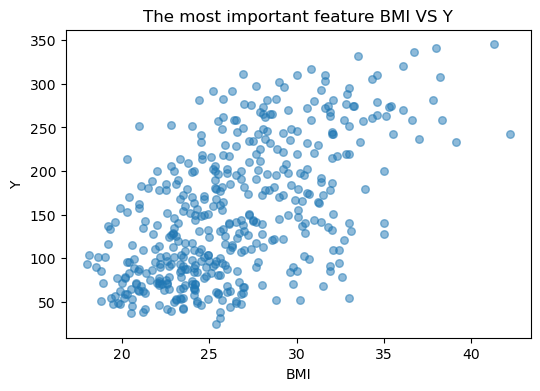

In [33]:
plt.figure(figsize=(6,4))
plt.scatter(X['BMI'],y,alpha=0.5,s=30)
plt.ylabel('Y')
plt.xlabel('BMI')
plt.title('The most important feature BMI VS Y')
plt.show()

### Problem 3 (10 points)

One EDA step we didn't cover in class is to check how strongly the features correlate with one another. Sometimes you will find strongly correlated or anti-correlated features in your feature matrix (the correlation coefficient is either +1 or -1 or very close to it). If that happens, it is a good idea to remove all but one of the strongly correlated features. This will have no impact on your model's performance, but may speed-up its convergence time.

Using the feature matrix of the diabetes dataset, calculate the Pearson correlation matrix of the features (see method [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)) and visualize the correlation matrix as a heatmap. Make sure that the feature names are on the x and y axes, add a colorbar to indicate the strength of the correlation. Note that the Pearson correlation coefficient is between -1 and 1 so make sure the color scale is between -1 and 1 on the figure.

Describe in a paragraph which two features have the strongest correlation. Is there a need to potentially remove any of the features?

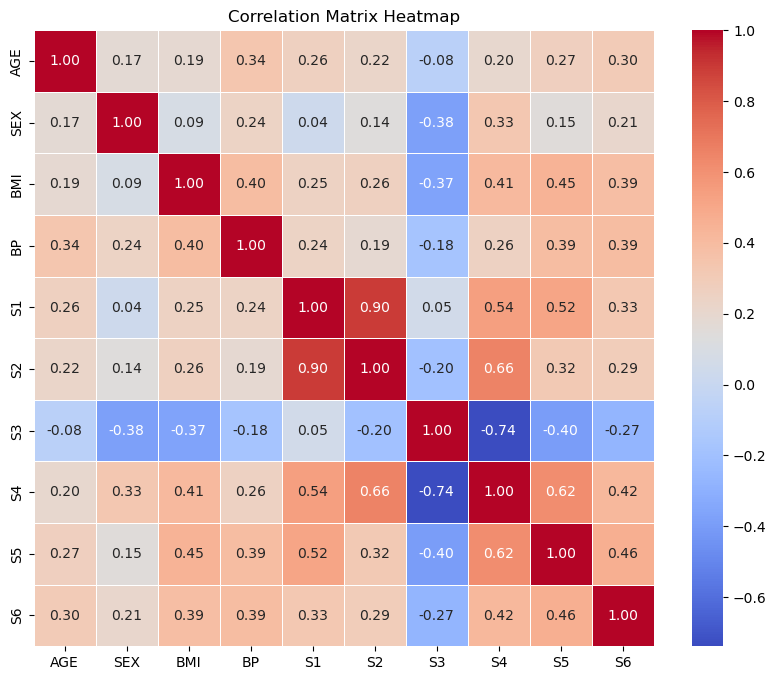

In [34]:
# your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_mat = X.corr(method='pearson')

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

*your text response here*

From the figure above, we can find that the feature 'S1' and 'S2' have the strongest correlation with 0.9 correlation coefficient.

In addition, I think whether we need to drop any feature should depend on the threshold of strong correlation. That is, we can drop the features whose correlation coefficients with any other features are all smaller than the threshold. For example, feature 'SEX' have small correlation coefficient with any other features, so we may remove this feature without making huge impact to machine learning model.